In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [118]:
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [119]:
path_data = "/content/releve_de_1000_etudiants_series_S2.csv"
data = pd.read_csv(path_data)

In [120]:
data["Moy"] = round((data.Maths*5 + data.PC*6 +	data.SVT*6 + data.Philo*2	+ data.Fr*3	+ data.Anglais*2	+ data.HG*2) / 26, 2)

In [121]:
data = data[data["Moy"] >= 10]

In [122]:
data.shape

(924, 8)

In [123]:
# data[["Maths", "PC", "SVT", "Philo", "Fr", "Anglais", "HG", "Moy"]] = StandardScaler().fit_transform(data[["Maths", "PC", "SVT", "Philo", "Fr", "Anglais", "HG", "Moy"]])

<Figure size 2160x504 with 0 Axes>

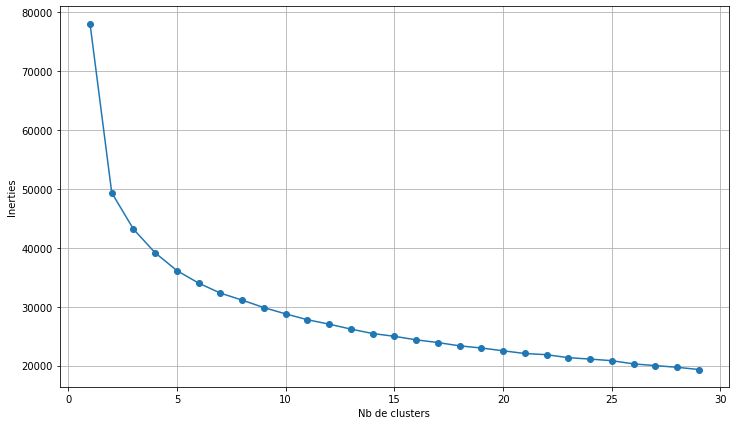

In [131]:
def optimize_k_mean(data, max_k):
  means = []
  inerties = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inerties.append(kmeans.inertia_)

  plt.figure(figsize=(30, 7))
  fig = plt.subplots(figsize=(12, 7))
  plt.plot(means, inerties, 'o-')
  plt.xlabel("Nb de clusters")
  plt.ylabel('Inerties')
  plt.grid(True)
  plt.show()

optimize_k_mean(data, 30)

In [125]:
# Grid search k allant de 1 à 5

In [126]:
data = np.array(data)
data

array([[16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       [16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       [16.  , 16.  , 16.  , ..., 16.  , 16.  , 16.  ],
       ...,
       [ 6.  , 16.  , 11.  , ..., 10.  , 11.  , 11.5 ],
       [14.  , 13.  ,  8.  , ..., 14.  ,  9.  , 11.65],
       [14.  ,  6.  , 10.  , ...,  7.  , 11.  , 10.35]])

In [127]:
kmeans = KMeans(n_clusters=27)
kmeans.fit(data)

KMeans(n_clusters=27)

In [128]:
# data['kmeans_3'] = kmeans.labels_

In [129]:
for i in range(0, 27):
  print("-"*10)
  print(f"Cluster {i}")
  print("-"*10)
  for j in data[kmeans.labels_==i]:
    print(f"Indi : {j}, Moy : {j[:-1].mean()}")

----------
Cluster 0
----------
Indi : [17.    6.   16.   13.    8.   14.   11.   12.19], Moy : 12.142857142857142
Indi : [16.    6.   19.   10.    8.    7.   15.   12.23], Moy : 11.571428571428571
Indi : [14.    6.   15.   12.    9.   10.   11.   11.12], Moy : 11.0
Indi : [15.    8.   15.   15.   10.   11.   11.   12.19], Moy : 12.142857142857142
Indi : [18.   14.   18.   16.    6.    8.   11.   14.23], Moy : 13.0
Indi : [16.    6.   17.   16.    8.   16.   10.   12.54], Moy : 12.714285714285714
Indi : [17. 10. 17. 15. 13. 10. 14. 14.], Moy : 13.714285714285714
Indi : [18.    6.   18.   12.   15.    7.   13.   13.19], Moy : 12.714285714285714
Indi : [15.   10.   16.   14.    8.   13.   12.   12.81], Moy : 12.571428571428571
Indi : [14.    9.   19.   12.    8.   10.   11.   12.62], Moy : 11.857142857142858
Indi : [15.   12.   15.   14.    6.   11.    9.   12.42], Moy : 11.714285714285714
Indi : [19.    8.   19.   12.   12.    7.   12.   13.65], Moy : 12.714285714285714
Indi : [15.    6

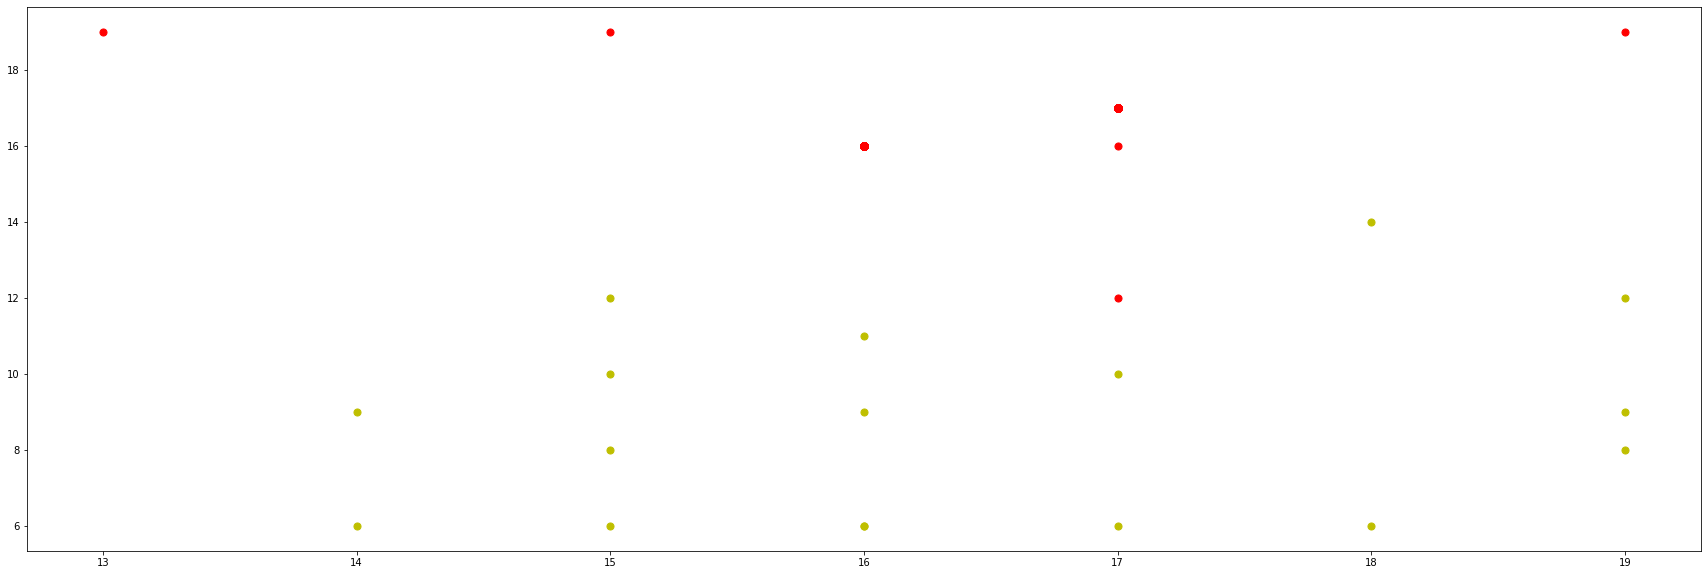

In [130]:
plt.figure(figsize=(30, 10))
plt.scatter(data[kmeans.labels_ == 0][:, 0], data[kmeans.labels_ == 0][:, 1], s=50, c="y")
plt.scatter(data[kmeans.labels_ == 1][:, 0], data[kmeans.labels_ == 1][:, 1], s=50, c="r")
# plt.scatter(data[kmeans.labels_ == 3][:, 0], data[kmeans.labels_ == 3][:, 1], s=50, c="g")
# plt.scatter(data[kmeans.labels_ == 4][:, 0], data[kmeans.labels_ == 4][:, 1], s=50, c="c")
# plt.scatter(data[kmeans.labels_ == 5][:, 0], data[kmeans.labels_ == 5][:, 1], s=50, c="m")
# plt.scatter(data[kmeans.labels_ == 6][:, 0], data[kmeans.labels_ == 6][:, 1], s=50, c="b")
# plt.scatter(data[kmeans.labels_ == 7][:, 0], data[kmeans.labels_ == 7][:, 1], s=50, c="k")
# plt.scatter(data[kmeans.labels_ == 8][:, 0], data[kmeans.labels_ == 8][:, 1], s=50, c="w")